<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [4]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [11]:
df.isna().sum()
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [14]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_ALL_G']
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['GRADES_ALL_G']

Final feature list: INSTRUCTION_EXPENDITURE_PER_STUDENT, TOTAL_EXPENDITURE_PER_STUDENT, TOTAL_REVENUE_PER_STUDENT, GRADES_ALL_G

Feature selection justification: I picked these features because I wanted to see if is math scores for 8th graders improve is schools spend more money on instructional related spendings. I also wanted to see if the size of the school (Total students), total spendings, and total earning of the school have a correlation to the math test scores of 8th graders.

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

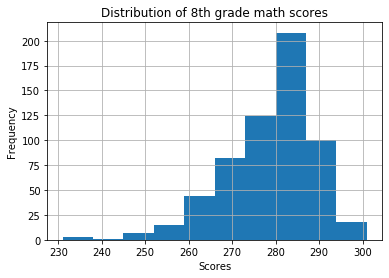

In [16]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

This is the distribution of 8th grade math scored

Visualization 2

Text(0, 0.5, '8th grade math score')

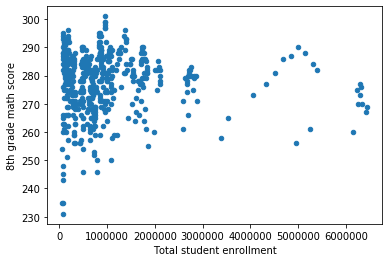

In [17]:
df.plot.scatter(x='GRADES_ALL_G',y='AVG_MATH_8_SCORE')
plt.xlabel('Total student enrollment')
plt.ylabel('8th grade math score')

8th grade math score compared to total student enrollment. Doesn't seem to have much correlation.

Visualization 3

Text(0, 0.5, '8th grade math score')

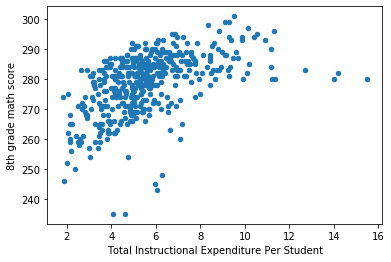

In [20]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Total Instructional Expenditure Per Student')
plt.ylabel('8th grade math score')

8th grade math score compared to Total Instructional Expenditure Per Student. Doesn't seem to have much correlation, seems to have some outliers.

Visualization 4

Text(0, 0.5, '8th grade math score')

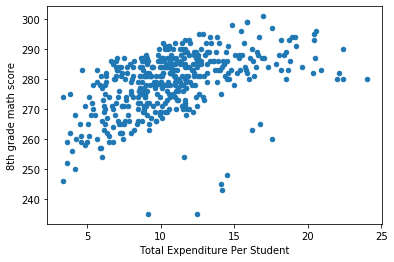

In [22]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('8th grade math score')

8th grade math score compared to Total Expenditure Per Student. Kind of has a semi positive correlation, but there are outliers.

Visualization 5

Text(0, 0.5, '8th grade math score')

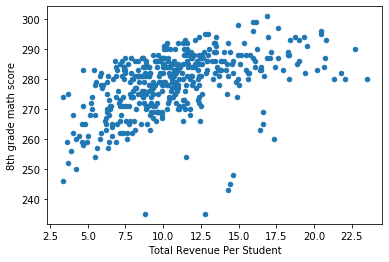

In [23]:
df.plot.scatter(x='TOTAL_REVENUE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Total Revenue Per Student')
plt.ylabel('8th grade math score')

8th grade math score compared to Total Revenue Per Student. Also seems to have a semi positive correlation, but there are outliers.

Visualization 6

Text(0.5, 1.0, '8th grade math score over time')

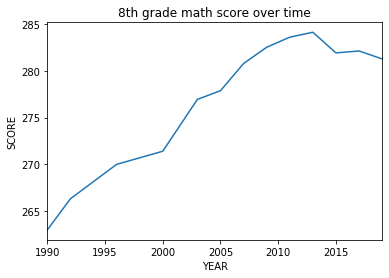

In [24]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

8th grade math over time. Trend seems to increase over time but dips down at 2015.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [25]:
from sklearn.model_selection import train_test_split

In [39]:
X = df[['TOTAL_REVENUE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT','TOTAL_EXPENDITURE_PER_STUDENT','GRADES_ALL_G']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>** Linear Regression

In [41]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [42]:
# create your model here
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = model.predict(X_test)
print(model.intercept_)
print(model.coef_)

267.58100702669907
[-1.26089343e+00  2.48321925e+00  1.11013421e+00 -9.63358962e-07]


In [48]:
model.score(X_test, y_test) ## R**2

0.25411414029027457

In [49]:
np.mean(np.abs(model.predict(X_test)-y_test)) ## Mean Absolute Error

7.333028568846098

In [32]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/nishka/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

Text(0, 0.5, 'Math 8 score')

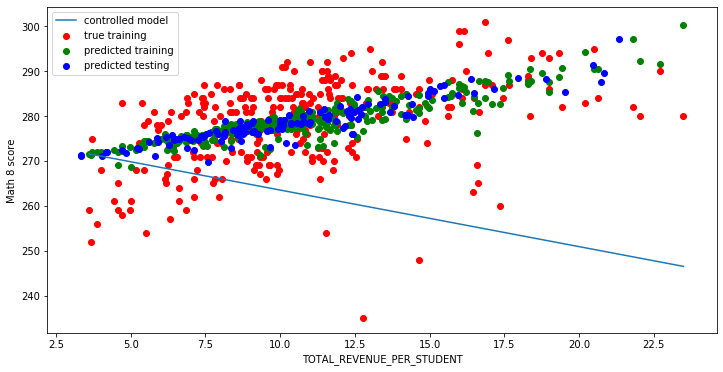

In [47]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
I wanted to see if Instruction Expenditure Per Student, Total Expenditure Per Studen, Total Revenue Per Student, and Total Students in the School had any correlation to the math test scores of 8th graders. After doing linear regression and computing the R^2 Value and mean absolute error, I found that the correlation is weak. The R^2 value is 0.254 and so we can say that there is a weak correlation since it's closer to 0 and we would usually like that number to be > 0.9 in order to say there's a correlation. The absolute mean error is 7.33 which is a kind of a large number considering that the scores range from 0 - 300. So based off of this, I would say there is no correlation.